In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler,LabelEncoder

# Linear Regression Assignment: Insurance Dataset

## Problem Statement
You have been provided with an **insurance dataset** that contains information about individuals, such as age, BMI, smoking status, and insurance charges. Your objective is to perform **Exploratory Data Analysis (EDA)** and build a **Linear Regression model** to predict the insurance charges based on the given features.

---

In [3]:
from google.colab import drive
drive.mount('/content/drive')
file_path=('/content/drive/MyDrive/class practice/insurance.csv')
df=pd.read_csv(file_path)
df.head()

Mounted at /content/drive


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520



## Section 1: Data Inspection and Cleaning (10 Marks)
### Q1. Load the dataset and display the first five rows.
- Identify the columns present in the dataset.
- Check for missing values and data types.


In [4]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [5]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


### Q2. Handle missing values and duplicates if any.
- Remove or impute missing values appropriately.
- Drop duplicate records if found.

---

In [7]:
df.duplicated().sum()

np.int64(1)

In [10]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

## Section 2: Exploratory Data Analysis (20 Marks)
### Q3. Perform Univariate Analysis on all numerical columns.
- Plot histograms and boxplots for each numerical column.
- Write your observations about the distribution of the data.


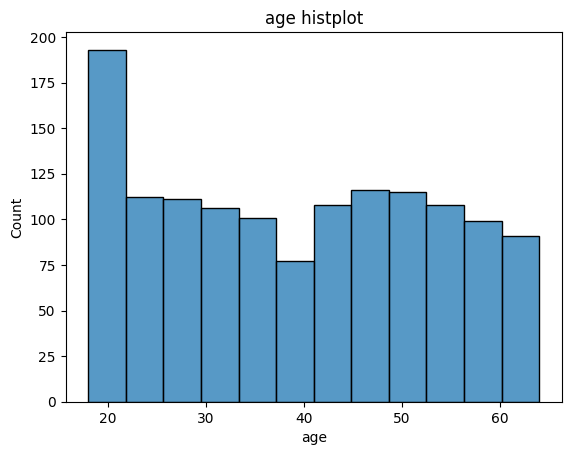

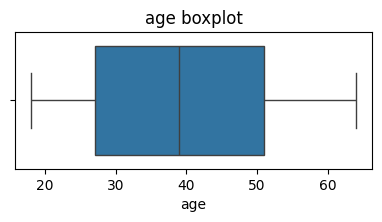

In [21]:
sns.histplot(data=df,x='age')
plt.title('age histplot')
plt.show()
sns.boxplot(data=df,x='age')
plt.title('age boxplot')
plt.tight_layout(pad=10.0)
plt.show()

observations:

1.most of the people from 20 age group

2.there is no outliers



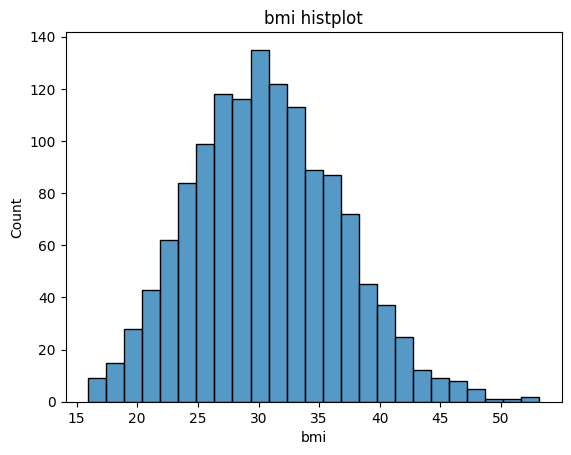

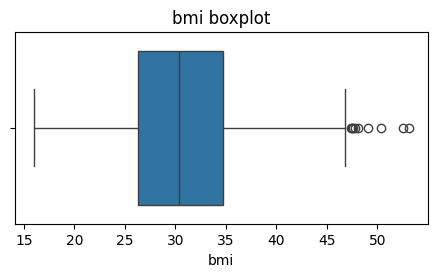

In [24]:
sns.histplot(data=df,x='bmi')
plt.title('bmi histplot')
plt.show()
sns.boxplot(data=df,x='bmi')
plt.title('bmi boxplot')
plt.tight_layout(pad=8.0)
plt.show()

observations:

1.Most of the data points are from 25 to 35.

2.There are outliers above bmi is 45, mostly datapoints are between 25 to 35

3.the outliers are falling right side it is right skewed

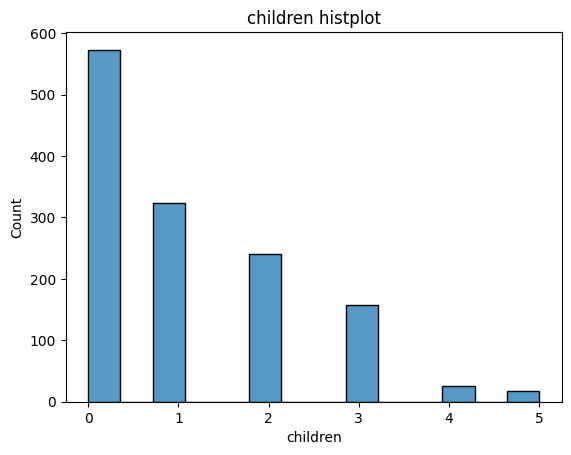

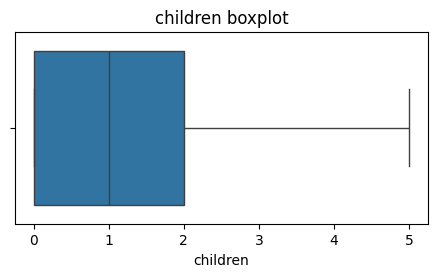

,proportion
children,
0,42.857143
1,24.233358
2,17.950636
3,11.742708
4,1.869858
5,1.346298


In [26]:
sns.histplot(data=df,x='children')
plt.title('children histplot')
plt.show()
sns.boxplot(data=df,x='children')
plt.title('children boxplot')
plt.tight_layout(pad=8.0)
plt.show()
df['children'].value_counts(normalize=True)*100

observations:

1.most of them have 0 childrens, 43% are have no childrens.

2.having 1,2 & 3 childrens are around 53%

3.and remaining are very less

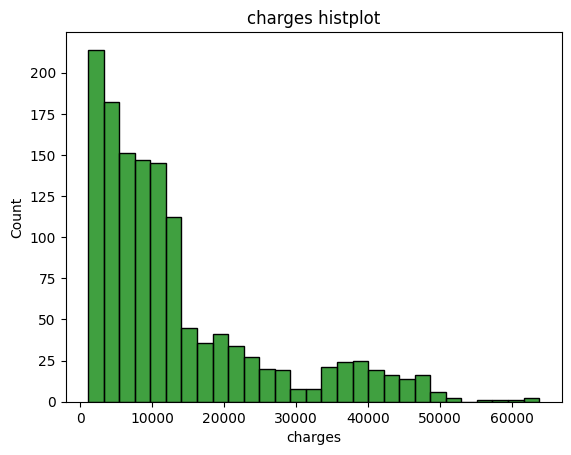

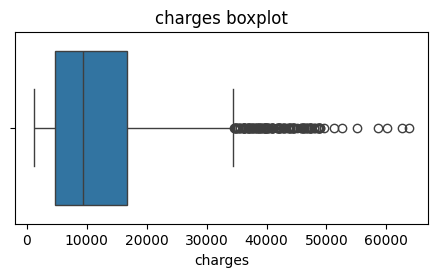

In [29]:
sns.histplot(data=df,x='charges',color='green')
plt.title('charges histplot')
plt.show()
sns.boxplot(data=df,x='charges')
plt.title('charges boxplot')
plt.tight_layout(pad=8.0)
plt.show()

observations:

1.Most of the peoples are belongs to crarges from 1000 to 17000.

2.there is clear outliers above 35000. in right side so it is right skewed.

### Q4. Perform Bivariate Analysis.
- Use scatter plots to analyze relationships between independent variables and insurance charges.
- Provide insights based on your observations.

Text(0.5, 1.0, 'age vs charges')

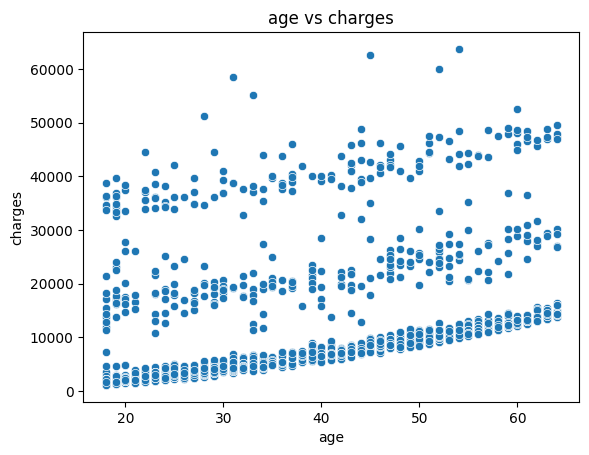

In [30]:
sns.scatterplot(data=df,x='age',y='charges')
plt.title('age vs charges')

observation:

1.Charges generally increase with age.



Text(0.5, 1.0, 'bmi vs charges')

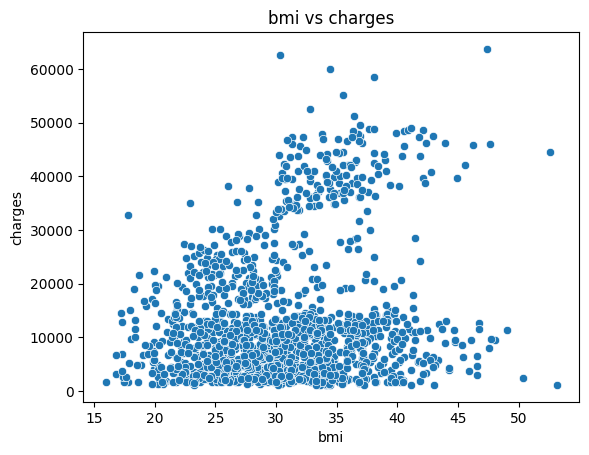

In [31]:
sns.scatterplot(data=df,x='bmi',y='charges')
plt.title('bmi vs charges')

observation:

1.Most of the data points are charges below 20000. and bmi is arount 23 to 35.

2.only bmi is between 30 to 35 have more than 30000 charge.

3.there are only few points more than charges is 50000

Text(0.5, 1.0, 'children vs charges')

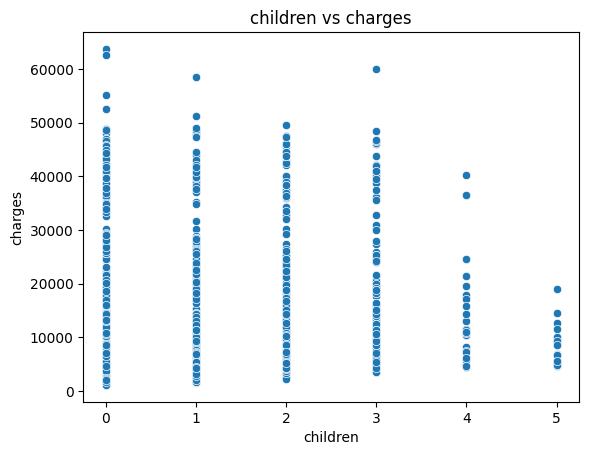

In [34]:
sns.scatterplot(data=df,x='children',y='charges')
plt.title('children vs charges')

observation:

1.who have no childerns have more no charges compare to others.

2.who have 1 to 3 childrens have similar charges.

3.who have more then 3 have less charges.

4.there is clear decreasing in charges when childrens r more.

Text(0.5, 1.0, 'smoker vs charges')

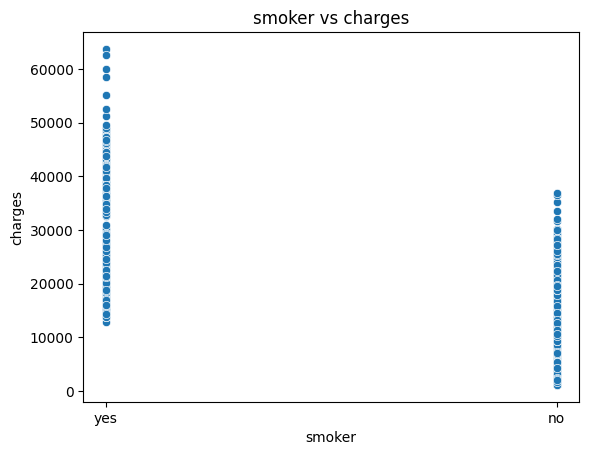

In [35]:
sns.scatterplot(data=df,x='smoker',y='charges')
plt.title('smoker vs charges')

observation:

1.we can see clear difference in this. smokers have more charges compared to non smokers.

2.it is a strong pattern we can say smoker charges is more

Text(0.5, 1.0, 'sex vs charges')

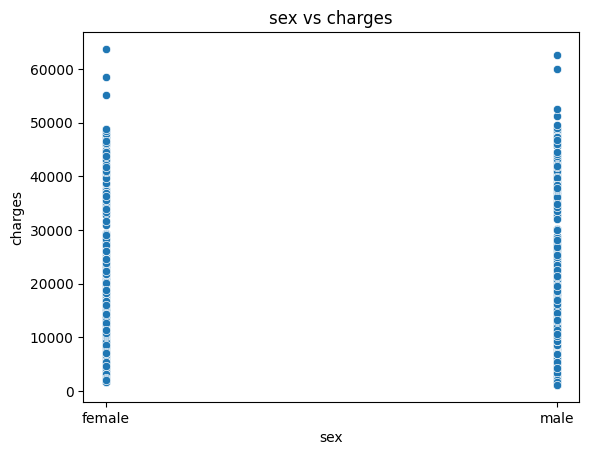

In [36]:
sns.scatterplot(data=df,x='sex',y='charges')
plt.title('sex vs charges')

observation:

there is no difference between both. there is same charges .

Text(0.5, 1.0, 'region vs charges')

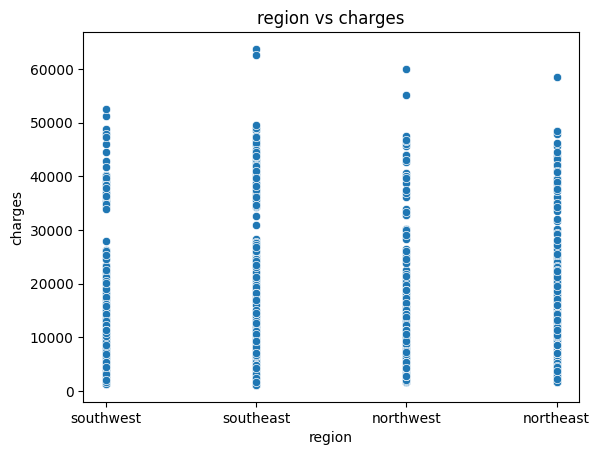

In [37]:
sns.scatterplot(data=df,x='region',y='charges')
plt.title('region vs charges')

observations:

1.there is no clear pattern in this plot all the charges a remains similar

### Q5. Perform Multivariate Analysis.
- Use pair plots to visualize relationships among all numerical variables.
- Write insights based on observed trends.

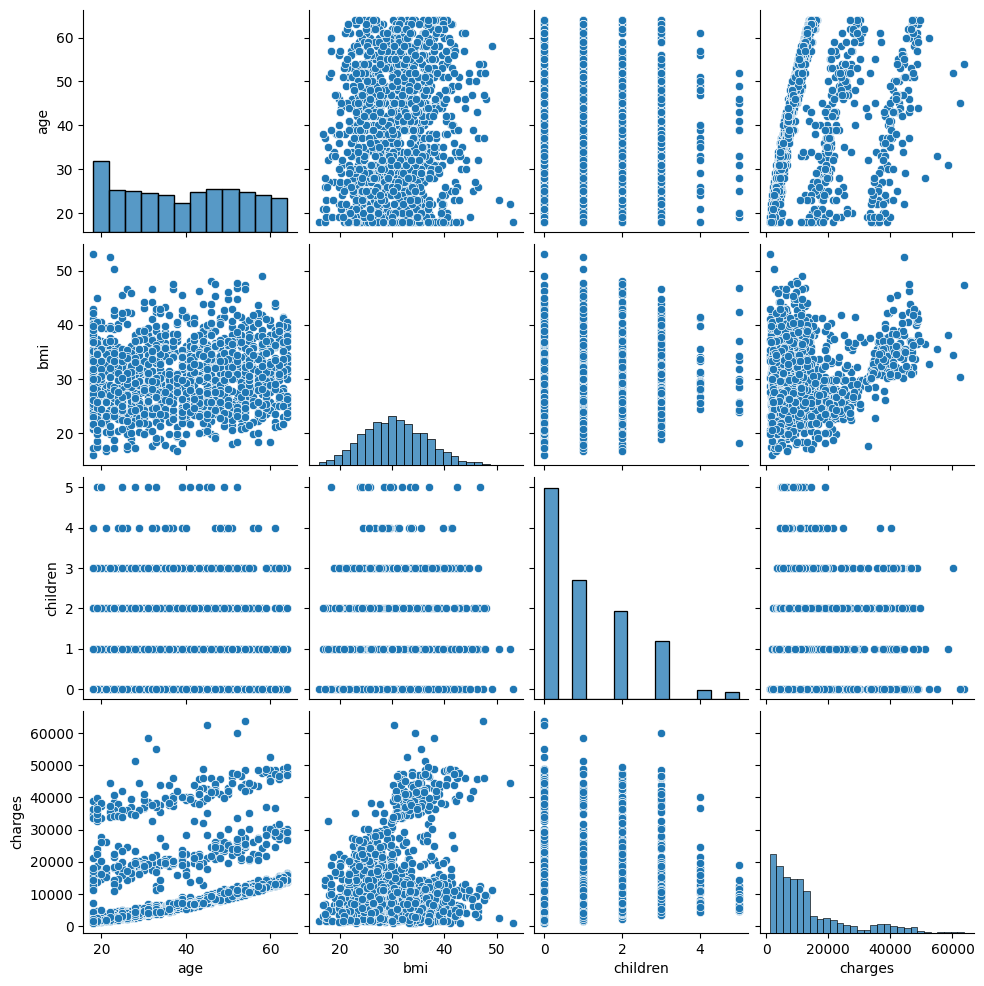

In [39]:
sns.pairplot(df)

### Q6. Generate a Heatmap.
- Display the correlation matrix using a heatmap.
- Identify highly correlated features and provide interpretations.

---

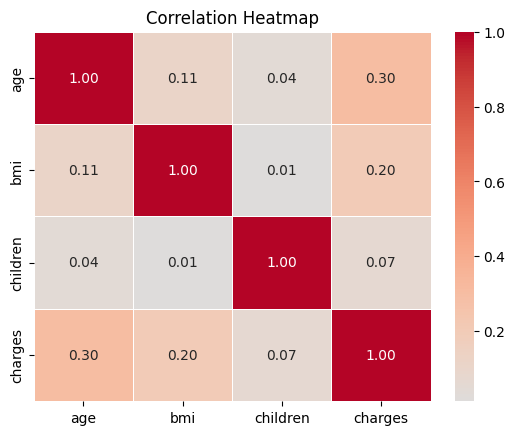

In [44]:
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True,fmt='.2f', cmap='coolwarm',center=0,  linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

## Section 3: Model Building and Evaluation (20 Marks)
### Q7. Split the dataset into training and testing sets.
- Use an **80-20** or **70-30** split.

In [53]:
le = LabelEncoder()
df['sex_le'] = le.fit_transform(df['sex'])
df['smoker_le'] = le.fit_transform(df['smoker'])
df['region_le'] = le.fit_transform(df['region'])

In [58]:
df

,age,bmi,children,charges,sex_le,smoker_le,region_le
0,19,27.900,0,16884.92400,0,1,3
1,18,33.770,1,1725.55230,1,0,2
2,28,33.000,3,4449.46200,1,0,2
3,33,22.705,0,21984.47061,1,0,1
4,32,28.880,0,3866.85520,1,0,1
...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,1
1334,18,31.920,0,2205.98080,0,0,0
1335,18,36.850,0,1629.83350,0,0,2
1336,21,25.800,0,2007.94500,0,0,3


In [61]:
x=df[['age','sex_le','bmi','children','smoker_le','region_le']]
y=df['charges']

In [64]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

In [65]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

### Q8. Build a **Linear Regression Model**.
- Train the model using the training dataset.
- Display the model coefficients and intercept.

In [66]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [68]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [70]:
model.score(X_train,y_train), model.score(X_test,y_test)

(0.736043270953723, 0.7724652729621758)

In [69]:
print("Coefficients:",model.coef_)
print("Intercept:",model.intercept_)

Coefficients: [  252.03741011  -110.31315941   322.2408649    524.49382188
 22855.75293908  -270.84084621]
Intercept: -11502.550522993795


### Q9. Evaluate the model on the test dataset.
- Compute **R-squared, Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE)**.


In [71]:
def adjusted_r2(r2, n, k):
    """Calculate the adjusted R²."""
    return 1 - (1 - r2) * (n - 1) / (n - k - 1)

In [72]:
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = mse_train ** 0.5
r2_train = r2_score(y_train, y_train_pred)
adj_r2_train = adjusted_r2(r2_train, len(y_train), X_train.shape[1])

In [73]:
print(f"\nTraining Performance:")
print(f"Mean Absolute Error (MAE): ${mae_train:.2f}")
print(f"Root Mean Squared Error (RMSE): ${rmse_train:.2f}")
print(f"R-squared (R²): {r2_train:.2f}")
print(f"Adjusted R-squared (Adj. R²): {adj_r2_train:.2f}")


Training Performance:
Mean Absolute Error (MAE): $4168.50
Root Mean Squared Error (RMSE): $5986.89
R-squared (R²): 0.74
Adjusted R-squared (Adj. R²): 0.73


In [76]:
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = mse_test ** 0.5
r2_test = r2_score(y_test, y_test_pred)
adj_r2_test = adjusted_r2(r2_test, len(y_test), X_test.shape[1])

In [77]:
print(f"\nTest Performance:")
print(f"Mean Absolute Error (MAE): ${mae_test:.2f}")
print(f"Root Mean Squared Error (RMSE): ${rmse_test:.2f}")
print(f"R-squared (R²): {r2_test:.2f}")
print(f"Adjusted R-squared (Adj. R²): {adj_r2_test:.2f}")


Test Performance:
Mean Absolute Error (MAE): $4182.80
Root Mean Squared Error (RMSE): $6239.81
R-squared (R²): 0.77
Adjusted R-squared (Adj. R²): 0.77


### Q10. Interpret the Error Metrics.
- Explain the significance of each metric in evaluating model performance.
- What do these values indicate about the model's accuracy?

---

In [78]:
print(f"\nTest Performance:")
print(f"Mean Absolute Error (MAE): ${mae_test:.2f}")
print(f"Root Mean Squared Error (RMSE): ${rmse_test:.2f}")
print(f"R-squared (R²): {r2_test:.2f}")
print(f"Adjusted R-squared (Adj. R²): {adj_r2_test:.2f}")


Test Performance:
Mean Absolute Error (MAE): $4182.80
Root Mean Squared Error (RMSE): $6239.81
R-squared (R²): 0.77
Adjusted R-squared (Adj. R²): 0.77


observation:

1. In this model both r-square(R²) and (Adj. R²) are equal. it predicts perfect.

## Section 4: Model Interpretation and Conclusion (10 Marks)
### Q11. Explain the significance of each feature in predicting insurance charges.
- Which features are most impactful?
- How does smoking status affect the charges?

### Q12. What are the limitations of your model?
- Discuss any assumptions of **Linear Regression** that might not hold in this dataset.
- Suggest improvements for better prediction accuracy.

---

## Submission Instructions
- Submit the **Jupyter Notebook (.ipynb)** with well-commented code and explanations.
- Provide visualizations and observations for each step.
- Ensure the notebook runs without errors before submission.

**Total Marks: 60**

---